In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

2024-06-09 07:56:23.798469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 07:56:23.798608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 07:56:23.955071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
for dirpath, dirnames, filenames in os.walk("/kaggle/input/face-expression-data/dataset"):
  print(f"There are {len(filenames)} images in '{dirpath}'.")

In [3]:
data_dir = '/kaggle/input/face-expression-recognition-dataset/images/train/'  # Update with the correct path to your dataset
target_dir="/kaggle/input/face-expression-data/dataset"
labels = []
imgs = len(data_dir)-1

file_paths = []
labels = []

# Assuming directory structure: dataset/class_name/image.jpg
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                file_paths.append(file_path)
                labels.append(folder)

# Create a DataFrame
data = pd.DataFrame({'filename': file_paths, 'label': labels})

# Check the structure of the dataset
print(data.head())

'''class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

for i in range(imgs):
            labels = class_names_label[i]'''
        
'''IMG_SIZE = (224, 224) # define image size
total_data= tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir, image_size=IMG_SIZE,label_mode="categorical",batch_size=32)'''

# Check the structure of the dataset
#print(labels.head())
#print(imgs)

                                            filename     label
0  /kaggle/input/face-expression-recognition-data...  surprise
1  /kaggle/input/face-expression-recognition-data...  surprise
2  /kaggle/input/face-expression-recognition-data...  surprise
3  /kaggle/input/face-expression-recognition-data...  surprise
4  /kaggle/input/face-expression-recognition-data...  surprise


'IMG_SIZE = (224, 224) # define image size\ntotal_data= tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir, image_size=IMG_SIZE,label_mode="categorical",batch_size=32)'

In [4]:
#Load data

def load_data(target_class, num_images=8):
  target_dir="/kaggle/input/face-expression-data/dataset"
  target_folder = os.path.join(target_dir, target_class)

  random_images = random.sample(os.listdir(target_folder), num_images)

  # Create a subplot to display multiple images
  plt.figure(figsize=(12, 6))
  for i, image in enumerate(random_images):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
    img = mpimg.imread(os.path.join(target_folder, image))
    plt.imshow(img)
    plt.title(f"{target_class} - {i + 1}")
    plt.axis("off")

  plt.show()


In [5]:
#load_data("Happy",8)

In [6]:
# Image data generator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Prepare the training data
train_generator = datagen.flow_from_dataframe(
    dataframe=data,
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
    #color_mode= 'grayscale'
)

# Prepare the validation data
validation_generator = datagen.flow_from_dataframe(
    dataframe=data,
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

Found 23057 validated image filenames belonging to 7 classes.
Found 5764 validated image filenames belonging to 7 classes.


In [7]:
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(7, activation='softmax')  # Assuming 7 expression classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
input_shape = (48, 48, 3)
model = create_model(input_shape)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,471 (1.18 MB)

 Trainable params: 310,471 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.layers import Rescaling, Resizing

model2 = tf.keras.Sequential([
    
    Rescaling(1/255),  # Rescale pixel values to [0, 1]
    Resizing(48, 48),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (48, 48, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model3 = Sequential()

# 1 - Convolution
model3.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,3)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# 2nd Convolution layer
model3.add(Conv2D(128,(5,5), padding='same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# 3rd Convolution layer
model3.add(Conv2D(512,(3,3), padding='same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# 4th Convolution layer
model3.add(Conv2D(512,(3,3), padding='same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Flattening
model3.add(Flatten())

# Fully connected layer 1st layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

# Fully connected layer 2nd layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(nb_classes, activation='softmax'))

print(model3.summary())

opt = Adam(learning_rate=0.0001)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,02

 Total params: 4,479,879 (17.09 MB)

 Trainable params: 4,475,911 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [10]:
history = model.fit(train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 178s 243ms/step - accuracy: 0.3068 - loss: 1.6113 - val_accuracy: 0.0000e+00 - val_loss: 4.7199
Epoch 2/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.0938 - loss: 1.6861 - val_accuracy: 0.0000e+00 - val_loss: 4.4479
Epoch 3/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.3237 - loss: 1.5655 - val_accuracy: 0.0000e+00 - val_loss: 7.1609
Epoch 4/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.4062 - loss: 1.5381 - val_accuracy: 0.0000e+00 - val_loss: 7.1872
Epoch 5/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.4256 - loss: 1.4112 - val_accuracy: 0.0042 - val_loss: 7.5151
Epoch 6/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.2812 - loss: 1.4734 - val_accuracy: 0.0000e+00 - val_loss: 6.0650
Epoch 7/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.4823 - loss: 1.3037 - val_accuracy: 0.0085 - val_loss: 8.3141
Epoch 8/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.

181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.0633 - loss: 14.4983
Validation Loss: 14.556766510009766, Validation Accuracy: 0.06800832599401474


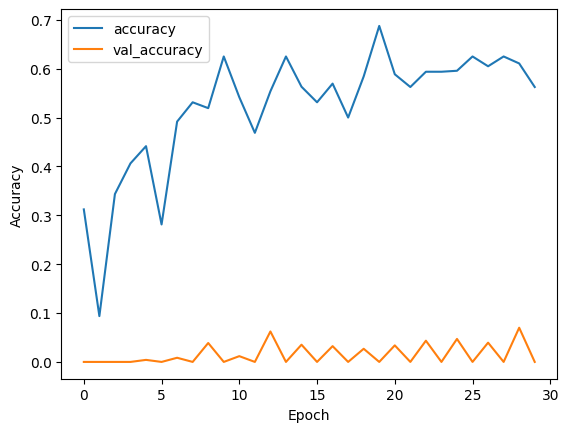

In [11]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
history = model2.fit(train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.2813 - loss: 1.7758 - val_accuracy: 0.0000e+00 - val_loss: 5.7227
Epoch 2/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.3125 - loss: 1.4804 - val_accuracy: 0.0000e+00 - val_loss: 5.8596
Epoch 3/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 78s 108ms/step - accuracy: 0.3610 - loss: 1.5361 - val_accuracy: 5.2083e-04 - val_loss: 5.2894
Epoch 4/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.4062 - loss: 1.6558 - val_accuracy: 0.0000e+00 - val_loss: 5.9477
Epoch 5/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 76s 105ms/step - accuracy: 0.4054 - loss: 1.4650 - val_accuracy: 0.0000e+00 - val_loss: 5.3278
Epoch 6/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.3750 - loss: 1.5624 - val_accuracy: 0.0000e+00 - val_loss: 3.4840
Epoch 7/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 71s 98ms/step - accuracy: 0.4296 - loss: 1.4040 - val_accuracy: 0.0000e+00 - val_loss: 11.8414
Epoch 8/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accura

181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.0000e+00 - loss: 24.0313
Validation Loss: 24.091453552246094, Validation Accuracy: 0.0


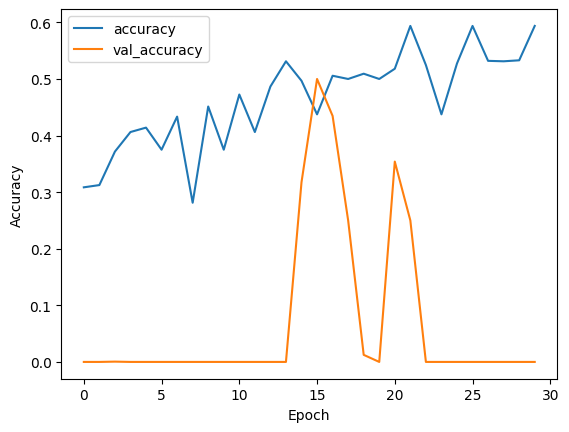

In [13]:
val_loss, val_accuracy = model2.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
history = model3.fit(train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 575s 791ms/step - accuracy: 0.2441 - loss: 1.9350 - val_accuracy: 0.0000e+00 - val_loss: 4.7843
Epoch 2/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 103us/step - accuracy: 0.4375 - loss: 1.4460 - val_accuracy: 0.0000e+00 - val_loss: 5.7140
Epoch 3/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 577s 801ms/step - accuracy: 0.3209 - loss: 1.6622 - val_accuracy: 0.0000e+00 - val_loss: 5.2427
Epoch 4/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 82us/step - accuracy: 0.4688 - loss: 1.5009 - val_accuracy: 0.0000e+00 - val_loss: 5.1767
Epoch 5/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 571s 791ms/step - accuracy: 0.3597 - loss: 1.5972 - val_accuracy: 0.0000e+00 - val_loss: 5.6959
Epoch 6/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2812 - loss: 1.6976 - val_accuracy: 0.0000e+00 - val_loss: 5.0956
Epoch 7/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 570s 791ms/step - accuracy: 0.3870 - loss: 1.5227 - val_accuracy: 0.0000e+00 - val_loss: 5.9457
Epoch 8/30
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 76us/step - ac

181/181 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.0272 - loss: 7.7715
Validation Loss: 7.764229774475098, Validation Accuracy: 0.02689104713499546


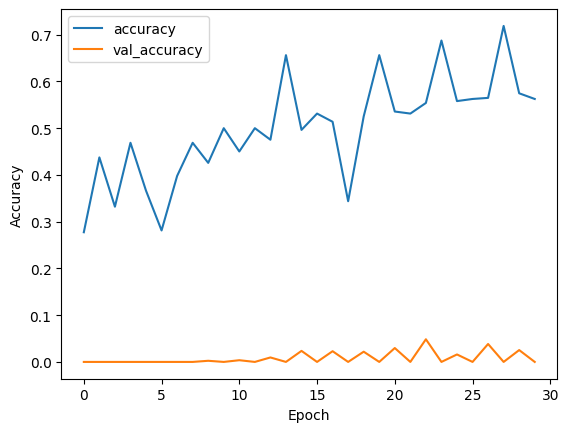

In [15]:
val_loss, val_accuracy = model3.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()